# Logistic Regression Step-by-Step Exercise Notebook (Binary and Multiclass with Scikit-learn)

This notebook provides a step-by-step guide to implementing Logistic Regression for **binary** and **multiclass** classification using Python and scikit-learn. You will work with the **Wine Quality Dataset** to predict wine quality. For binary classification, you'll predict whether a wine is of good quality (1) or poor quality (0). For multiclass classification, you'll predict specific quality ratings (e.g., 3, 4, 5, etc.). The exercises focus on Python implementations using scikit-learn and Pandas for data handling.

## Instructions
- Follow each step carefully and complete the code in the provided cells.
- Run each cell to verify your implementation and view outputs.
- Submit your completed notebook with code outputs.
- Ensure you have the required libraries: `pandas`, `numpy`, `matplotlib`, `scikit-learn`. Install them using:
  ```bash
  pip install pandas numpy matplotlib scikit-learn
  ```

## Dataset
- **Wine Quality Dataset**: Contains chemical properties of wines and their quality ratings.
- **Features**: `alcohol` (alcohol content), `volatile acidity` (acetic acid content).
- **Target (Binary)**: Quality binarized as 0 (poor, quality < 6) or 1 (good, quality ≥ 6).
- **Target (Multiclass)**: Quality rating (integer values, e.g., 3 to 8).
- The dataset is loaded from a URL: `https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv`.

## Learning Objectives
- Use scikit-learn to implement Logistic Regression for binary and multiclass classification.
- Preprocess data using Pandas and scikit-learn.
- Evaluate models using performance metrics and visualize results.

---

## Section 1: Binary Logistic Regression (Scikit-learn)

In this section, you will use scikit-learn to implement Logistic Regression for **binary classification** to predict whether a wine is of good (1) or poor (0) quality based on `alcohol` and `volatile acidity` features.

### Step 1.1: Load and Prepare the Dataset

**Explanation**: Load the Wine Quality Dataset, select `alcohol` and `volatile acidity` as features, and create a binary target (1 for quality ≥ 6, 0 otherwise). Split the data into training (80%) and test (20%) sets.

**Task**: Complete the data loading and splitting.

**Code**:

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

X = df[['alcohol', 'volatile acidity']]
df['quality_binary'] = (df['quality'] >= 6).astype(int)
y = df['quality_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


### Step 1.2: Scale Features

**Explanation**: Standardize the features to have zero mean and unit variance, which improves the performance of Logistic Regression by ensuring features are on the same scale.

**Task**: Complete the feature scaling.

**Code**:

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform X_train
# Your code here
X_train = scaler.fit_transform(X_train)

# Transform X_test
# Your code here
X_test = scaler.transform(X_test)
# print the size of training and testing sets


### Step 1.3: Train the Model

**Explanation**: Train a LogisticRegression model using scikit-learn with hyperparameter tuning via GridSearchCV to find the best regularization parameter (`C`).

**Task**: Complete the model training and hyperparameter tuning.

**Code**:

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Your code here 
params_grid={"C":[0.01,0.1,1,10,100]}
clf=LogisticRegression(max_iter=1000)
grid=GridSearchCV(clf,params_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

### Step 1.4: Predict and Evaluate

**Explanation**: Predict on the test set and compute evaluation metrics (accuracy, precision, recall, F1-score, ROC AUC). Plot the ROC curve to visualize the model's performance.

**Task**: Complete the prediction and evaluation.

**Code**:

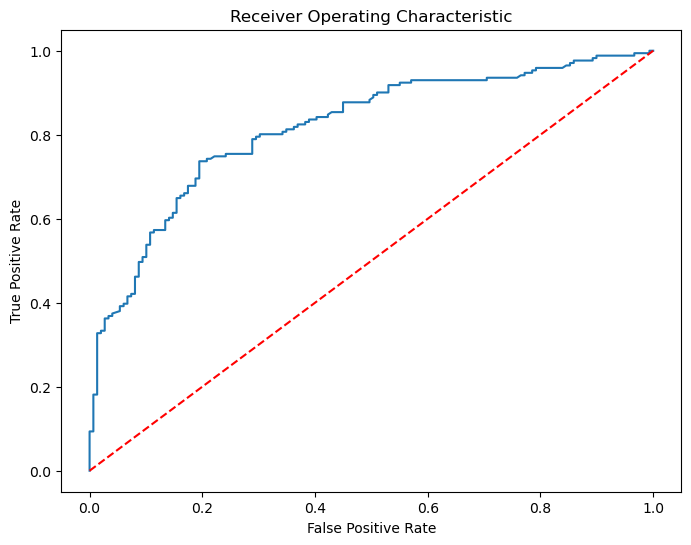

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

# Your code here
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'r--')

## Section 2: Multiclass Logistic Regression (Scikit-learn)

In this section, you will use scikit-learn to implement **multiclass Logistic Regression** to predict specific wine quality ratings (e.g., 3 to 8).

### Step 2.1: Load and Split the Dataset

**Explanation**: Load the dataset and use the original `quality` column as the multiclass target. Split into training (80%) and test (20%) sets.

**Task**: Complete the data splitting.

**Code**:

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
X = df[['alcohol', 'volatile acidity']]
y = df['quality']

# Split the dataset into training and testing sets
# Your code here



### Step 2.2: Scale Features

**Explanation**: Standardize the features for the multiclass model to ensure consistent scaling across features.

**Task**: Complete the feature scaling.

**Code**:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform X_train
# Your code here

# Transform X_test
# Your code here

# print the size of training and testing sets


### Step 2.3: Train the Multiclass Model

**Explanation**: Train a LogisticRegression model with the `multinomial` setting for softmax regression to handle multiple classes.

**Task**: Complete the model training.

**Code**:

In [21]:
from sklearn.linear_model import LogisticRegression

# Your code here


### Step 2.4: Predict and Evaluate

**Explanation**: Predict quality ratings on the test set and compute macro-averaged metrics (accuracy, precision, recall, F1-score, ROC AUC). Visualize the confusion matrix to understand classification performance across classes.

**Task**: Complete the prediction and evaluation.

**Code**:

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Your code here